# Titanic Survival Predictor

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This notebook is part of a challenge from Kaggle. Link to challenge: https://www.kaggle.com/competitions/titanic

## Importing libraries

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Dataset

In [280]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [281]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [282]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Analysis

### Checking for null values using heatmaps

<AxesSubplot:>

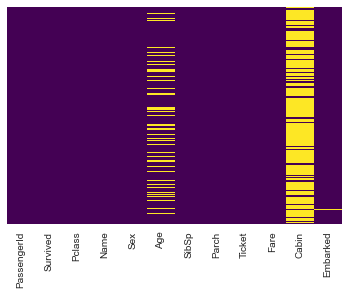

In [283]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

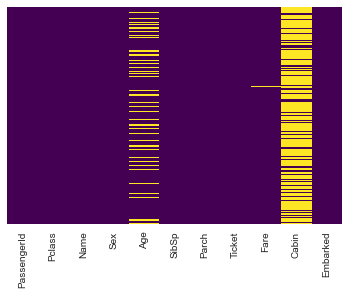

In [284]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Countplot for number of people survived

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

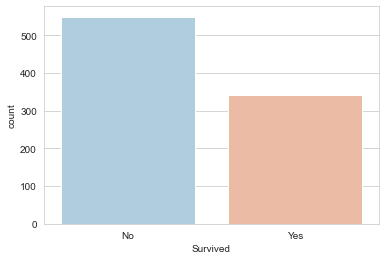

In [285]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data=train, palette='RdBu_r').set_xticklabels(['No','Yes'])

### Countplot for number of people survived on the basis of gender

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

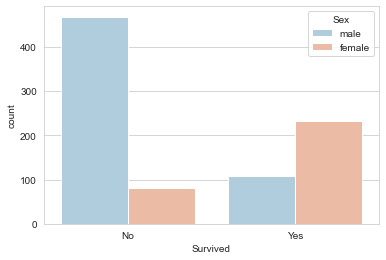

In [286]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data=train, palette='RdBu_r').set_xticklabels(['No','Yes'])

### Countplot for number of people survived on the basis of class

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

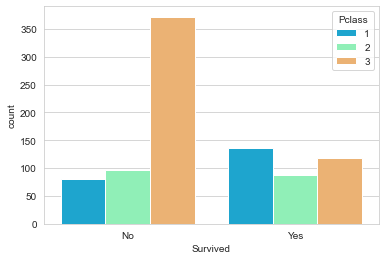

In [287]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette='rainbow').set_xticklabels(['No','Yes'])

### Age distribution on the ship

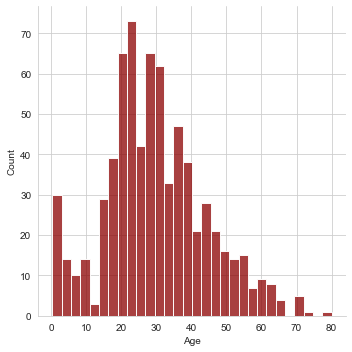

In [288]:
sns.displot(train['Age'].dropna(), bins = 30, color = 'darkred', kde = False)

### Countplot of number of siblings of spouses for each passenger

Text(0.5, 0, 'Number of siblings or spouses')

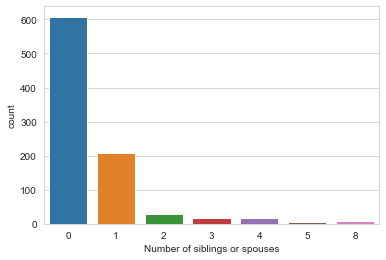

In [289]:
sns.set_style('whitegrid')
sns.countplot(x = 'SibSp', data = train)
plt.xlabel("Number of siblings or spouses")

### Distribution of fare

<Figure size 576x432 with 0 Axes>

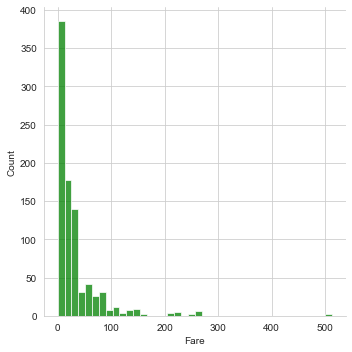

<Figure size 576x432 with 0 Axes>

In [290]:
sns.displot(train['Fare'], color='green', bins = 40)
plt.figure(figsize=(8,6))

### Countplot for number of people on the basis of origin of their journey

[Text(0, 0, 'Southampton'), Text(1, 0, 'Cherbourg'), Text(2, 0, 'Queenstown')]

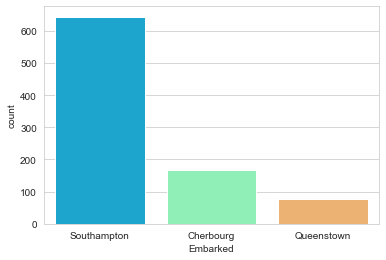

In [291]:
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked', data = train, palette='rainbow').set_xticklabels(
    ["Southampton","Cherbourg","Queenstown"])

## Data Cleaning

### Boxplot for Passenger class vs Age

Text(0.5, 0, 'Passenger Class')

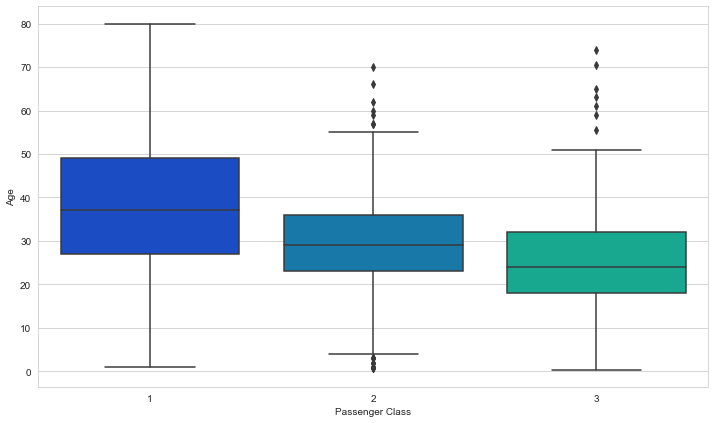

In [292]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette='winter')
plt.xlabel("Passenger Class")

### Calculating average age according to the passenger class

In [293]:
def impute_age(cols):
    Age = cols[0]
    PClass = cols[1]
    
    if pd.isnull(Age):
        
        if PClass == 1:
            return train.groupby('Pclass')['Age'].mean()[1]
        elif PClass == 2:
            return train.groupby('Pclass')['Age'].mean()[2]
        else:
            return train.groupby('Pclass')['Age'].mean()[3]
    else:
        return Age 

In [294]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

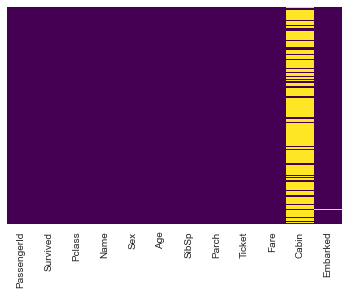

In [295]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap='viridis')

### Dropping coloumn "Cabin" since it doesn't provide sufficient information

In [296]:
train.drop('Cabin', inplace=True, axis = 1)
test.drop('Cabin', inplace = True, axis = 1)

In [297]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [298]:
train.dropna(inplace = True)
test.fillna(inplace = True, value = test['Fare'][0])

## Converting Categorical figures

For Logistic Regression

In [299]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [300]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [301]:
sex_train = pd.get_dummies(train['Sex'], drop_first=True)
embarked_train = pd.get_dummies(train['Embarked'], drop_first = True)

In [302]:
sex_test = pd.get_dummies(test['Sex'], drop_first=True)
embarked_test = pd.get_dummies(test['Embarked'], drop_first = True)

In [303]:
train.drop(['Sex','Embarked','Name','Ticket'], inplace = True, axis = 1)
test.drop(['Sex','Embarked','Name','Ticket'], inplace = True, axis = 1)

In [304]:
train = pd.concat([train, sex_train, embarked_train], axis = 1)
test = pd.concat([test, sex_test, embarked_test], axis = 1)

In [305]:
train.drop(['PassengerId'], inplace = True, axis = 1)
test.drop(['PassengerId'], inplace = True, axis = 1)

In [306]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [307]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


## Building the Logistical Regression Model
Assigning values to the training and test variables

In [308]:
from sklearn.model_selection import train_test_split

In [309]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

In [310]:
X_test = test

## Building the Model

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [312]:
logisticmodel = LogisticRegression(solver='lbfgs', max_iter=400)
logisticmodel.fit(X_train, y_train)

LogisticRegression(max_iter=400)

### Making Predictions on the basis of Test Data

In [313]:
predictions = logisticmodel.predict(X_test)

In [314]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

### Final Outcome

In [315]:
test['Survived'] = predictions

In [316]:
test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3,34.50000,0,0,7.8292,1,1,0,0
1,3,47.00000,1,0,7.0000,0,0,1,0
2,2,62.00000,0,0,9.6875,1,1,0,0
3,3,27.00000,0,0,8.6625,1,0,1,0
4,3,22.00000,1,1,12.2875,0,0,1,1
...,...,...,...,...,...,...,...,...,...
413,3,25.14062,0,0,8.0500,1,0,1,0
414,1,39.00000,0,0,108.9000,0,0,0,1
415,3,38.50000,0,0,7.2500,1,0,1,0
416,3,25.14062,0,0,8.0500,1,0,1,0


### Result

In [319]:
result = pd.read_csv('titanic_test.csv')
result['Survived'] = predictions
result

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [326]:
result[{'PassengerId','Survived'}]

/var/folders/qk/m4jq1r0d1n92km4tkts515fr0000gn/T/ipykernel_2171/340302721.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  result[{'PassengerId','Survived'}]


,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308
